In [2]:
%matplotlib inline

In [3]:
import sys
sys.path.append('/home/mayalaidler/mypython/bin/seticore/python')

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import capnp
import viewer 
import pandas as pd
import seaborn as sns

kj/filesystem-disk-unix.c++:1734: warning: PWD environment variable doesn't match current directory; pwd = /mnt_home/mayalaidler


In [5]:
filename01 = '/datax/scratch/danielc/jwst-test-data/guppi_60450_05861_003791_JWST_0001.band01.beam41.h5'
filename02 = '/datax/scratch/danielc/jwst-test-data/guppi_60450_05861_003791_JWST_0001.band01.beam00.h5'
filename03 = '/datax/scratch/danielc/jwst-test-data/guppi_60450_05861_003791_JWST_0001.band01.incoherent.h5'
filename04 = '/datax/scratch/danielc/jwst-test-data/MeerKAT-array_1-20240520T013741Z.bfr5'
filename05 = '/datax/scratch/danielc/jwst-test-data/guppi_60450_05861_003791_JWST_0001.hits'
filename06 = '/datax/scratch/danielc/jwst-test-data/guppi_60450_05861_003791_JWST_0001.stamps'

fn01 = '/datax/scratch/danielc/jwst-test-data/jwst-may-20/MeerKAT-array_1-20240520T013741Z-original.bfr5'
fn02 = '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band00.beam00.h5'
fn03 = '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.hits'
fn04 = '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.stamps'


events = list(viewer.read_hits(fn03))

In [6]:
with h5py.File(filename02, 'r') as h5_file:
    data = h5_file["data"][()]
    
data = data[:, 0, :]

In [7]:
# Open the bfr5 file
with h5py.File(filename04, 'r') as f:
    # Print all groups and datasets to explore the file structure
    def print_structure(name, obj):
        f.visititems(print_structure)
    try:
        phase_center_ra = f['/obsinfo/phase_center_ra'][()]
        phase_center_dec = f['/obsinfo/phase_center_dec'][()]
        print(f"Phase Center (RA, Dec): ({phase_center_ra}, {phase_center_dec})")
    except KeyError:
        print("Phase center information not found in the expected location.")

Phase Center (RA, Dec): (4.599848695775052, 0.5089336465584164)


In [8]:
# Open the bfr5 file
with h5py.File(filename04, 'r') as f:
    # Print all groups and datasets to explore the file structure
    def print_structure(name, obj):
        f.visititems(print_structure)
    try:
        beam_ra = f['/beaminfo/ras'][()]
        beam_dec = f['/beaminfo/decs'][()]
        t_samp = f['']
        
        print(f"Beams (RA, Dec): ({beam_ra}, {beam_dec})")
    except KeyError:
        print("Phase center information not found in the expected location.")


beam_ra = np.array(beam_ra)
beam_dec = np.array(beam_dec)
reshaped_beam = np.vstack((beam_ra, beam_dec)).T       
# reshaped_beam = ({beam_ra}, {beam_dec}).reshape((2, 1)) #reshape the flat list into a 2D matrix.
print(reshaped_beam[:4])

Phase center information not found in the expected location.
[[ 4.5998487  -0.50893365]
 [ 4.59976179 -0.51157588]
 [ 4.59978397 -0.50895207]
 [ 4.59973961 -0.50896371]]


In [9]:
#trying to subtract the beams 
print(reshaped_beam[0])
# for ra,dec in reshaped_beam:
#     ra = phase_center_ra - ra
#     dec = phase_center_dec - dec

# reshaped_beam2 = np.vstack((ra, dec)).T   

relative_ra = phase_center_ra - reshaped_beam[:, 0]
relative_dec = phase_center_dec - reshaped_beam[:, 1]
reshaped_beam3 = np.vstack((relative_ra, relative_dec)).T


print(relative_ra[:])    

[ 4.5998487  -0.50893365]
[ 0.00000000e+00  8.69028523e-05  6.47232082e-05  1.09082496e-04
  8.69028523e-05  8.69028523e-05  8.69028523e-05  8.69028523e-05
 -7.85761774e-04  9.59567478e-04 -2.53109103e-03  2.70489673e-03]


In [10]:
# plt.scatter(reshaped_beam3[:, 0], reshaped_beam3[:, 1], marker='o', c='r')
# plt.xlabel('RA (Radians)')
# plt.ylabel('Dec (Radians)')
# plt.title('Beam Position Offet from center')
# plt.grid(True)

In [11]:

# def extract_event_data(events):
#     # Assuming each event has 'numChannels', 'numTimesteps', and 'data' fields
#     data_list = []
#     for event in events:
#         # print(np.array(event.filterbank.data).shape)
#         # Extract relevant data (assuming event has a data attribute that's a flat list)
#         num_channels = event.filterbank.numChannels
#         num_timesteps = event.filterbank.numTimesteps
#         fch1 = event.filterbank.fch1
#         foff = event.filterbank.foff
#         freq_axis = np.arange(fch1, (fch1 + foff) * num_channels, foff)        

#         # Reshape data if needed, or simply append if it's a flat structure
#         if len(event.filterbank.data) == num_channels * num_timesteps:
#             reshaped_data = np.array(event.filterbank.data).reshape((num_timesteps, num_channels))
#         else:
#             # Handle other cases or raise an error
#             raise ValueError("Data length does not match expected dimensions")
#         data_list.append(reshaped_data)

#     return data_list

# # Extract data and convert to a matrix
# data_matrices = extract_event_data(events)

# # Let's say we want to concatenate all these matrices along the time axis
# for data_matrix in data_matrices[:5]:
#     # Plotting the data as a waterfall plot (spectrogram)
#     plt.figure(figsize=(12, 6))
#     plt.imshow(10 * np.log10(data_matrix), aspect='auto', cmap='viridis', origin='lower')
#     plt.colorbar(label='Intensity (dB)')
#     plt.xlabel('Frequency Channels (MHz)')
#     plt.ylabel('Time Bins')
#     plt.title('Waterfall Plot')
#     plt.show()


In [12]:
# f = h5py.File(fn01, mode = 'r')
# c = f['data'][:]
# twoData = c.squeeze()
# print(twoData)
# print("keys:", list(f.keys()))
# print("data:", f['data'][:])

In [13]:
def print_name(name, obj):
    if isinstance(obj, h5py.Dataset):
        print ('Dataset:', name)
    elif isinstance(obj, h5py.Group):
        print ('Group:', name)
        
with h5py.File(filename01, 'r')  as h5f: # file will be closed when we exit from WITH scope
    h5f.visititems(print_name)

Dataset: data


In [14]:
# print(f"Data shape: {data.shape}")
# print(f"Data type: {data.dtype}")
# # Shape becomes (59, 524288)

# # Compute the time axis (assuming uniform sampling in time)
# # t = np.arange(data.shape[0])


# plt.figure(figsize=(12, 6))
# plt.imshow(10*np.log10(data[:,3000:4000]), aspect='auto', cmap='viridis')
#     #extent=[freqs.min()/1.6e-8, freqs.max()/1.9e-8, t.min(), t.max()], cmap='viridis')

# plt.colorbar(label='Intensity')
# plt.xlabel('Frequency (MHz)')
# plt.ylabel('Time index')
# plt.title('Spectrogram')
# plt.show()

Data shape: (59, 524288)
Data type: float32


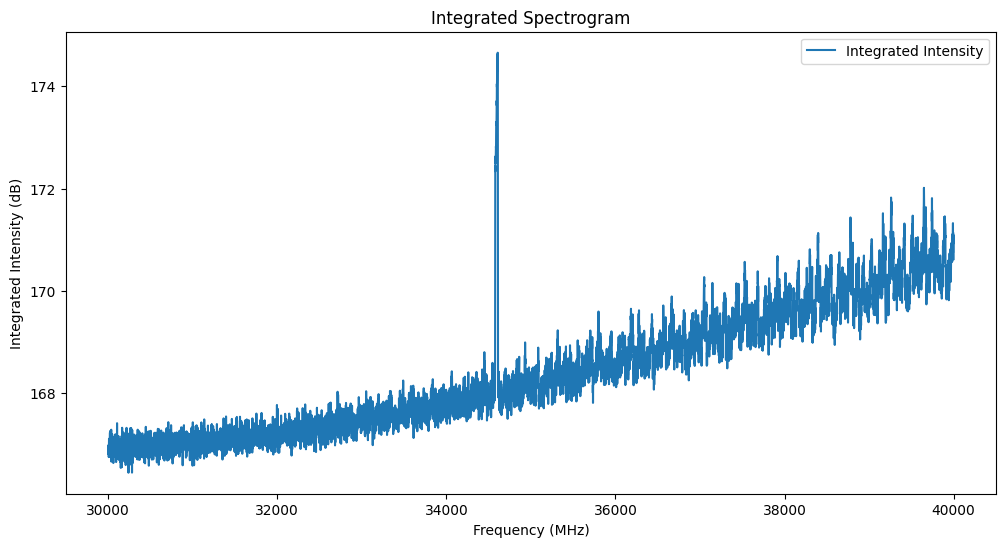

In [15]:
# Assuming `data` is already defined and is a 2D NumPy array
# Print data shape and type
print(f"Data shape: {data.shape}")
print(f"Data type: {data.dtype}")

# Select a subset of the data for integration
data_subset = data[0:59, 30000:40000]

# Integrate along the time axis (axis=0)
integrated_data = np.sum(data_subset, axis=0)

# Generate the frequency axis (assuming uniform sampling)
# Replace `start_freq` and `end_freq` with your actual frequency range
start_freq = 30000  # Example start frequency in MHz
end_freq = 40000    # Example end frequency in MHz
freqs = np.linspace(start_freq, end_freq, data_subset.shape[1])

# Plot the integrated data
plt.figure(figsize=(12, 6))
plt.plot(freqs, 10 * np.log10(integrated_data), label='Integrated Intensity')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Integrated Intensity (dB)')
plt.title('Integrated Spectrogram')
plt.legend()
plt.show()


In [16]:
with h5py.File(filename01, 'r') as f:
    # Print all keys in the file to explore the structure
    def print_attrs(name, obj):
        print(name)
        for key, val in obj.attrs.items():
            print(f"    {key}: {val}")

    f.visititems(print_attrs)

data
    fch1: 2270.2789306640625
    foff: 1.6298145055770874e-06
    nfpc: 131072
    source_name: b'Gaia_4060277947800771456'
    src_dej: -29.223423031386407
    src_raj: 17.574054624789404
    telescope_id: 64
    tsamp: 4.9085340525714285
    tstart: 60450.06783880672


In [17]:
eventhits = list(viewer.read_hits(fn03))


In [18]:
import capnp
import pandas as pd

# Load the schema
hit_capnp = capnp.load('/mnt_home/mayalaidler/mypython/bin/seticore/hit.capnp')

# Define a function to read the .hits file
def read_hits(filename):
    with open(filename, 'rb') as f:
        hits = hit_capnp.Hit.read_multiple(f)
        data = [hit.to_dict()['filterbank'] for hit in hits]
        f.seek(0,0)
        hits = hit_capnp.Hit.read_multiple(f)
        data2 = [hit.to_dict()['signal'] for hit in hits]
        d = pd.DataFrame(data)
        d2 = pd.DataFrame(data2)
        d3 = pd.concat([d, d2], axis = 1, join = 'outer')
    return d3

# Load the .hits file as a pandas DataFrame
df = read_hits(fn03)
x = np.where(df['snr'] > 10000)[0]


In [19]:
# # ra_values = df['filterbank'].apply(lambda x: x['ra'])
# # dec_values = df['filterbank'].apply(lambda x: x['dec'])

# # Open the bfr5 file
# with h5py.File(fn01, 'r') as f:
#     # Print all groups and datasets to explore the file structure
#     def print_structure(name, obj):
#         f.visititems(print_structure)
#     try:
#         phase_center_ra1 = f['/obsinfo/phase_center_ra'][()]
#         phase_center_dec1 = f['/obsinfo/phase_center_dec'][()]
#         print(f"Phase Center (RA, Dec): ({phase_center_ra}, {phase_center_dec})")
#     except KeyError:
#         print("Phase center information not found in the expected location.")

# print(ra_values[:2])
# print(dec_values[:2])

# adjusted_ra = ra_values - phase_center_ra1
# adjusted_dec = dec_values - phase_center_dec1

# print(adjusted_ra[:2])
# print(adjusted_dec[:2])

# plt.figure(figsize=(12, 6))
# plt.plot(adjusted_dec,adjusted_ra, 'ro')
# plt.xlabel('dec(radians)')
# plt.ylabel('ra(radians)')

Index(['sourceName', 'fch1', 'foff', 'tstart', 'tsamp', 'ra', 'dec',
       'telescopeId', 'numTimesteps', 'numChannels', 'data', 'coarseChannel',
       'startChannel', 'beam', 'frequency', 'index', 'driftSteps', 'driftRate',
       'snr', 'coarseChannel', 'beam', 'numTimesteps', 'power',
       'incoherentPower'],
      dtype='object')


/tmp/ipykernel_2688954/936083977.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


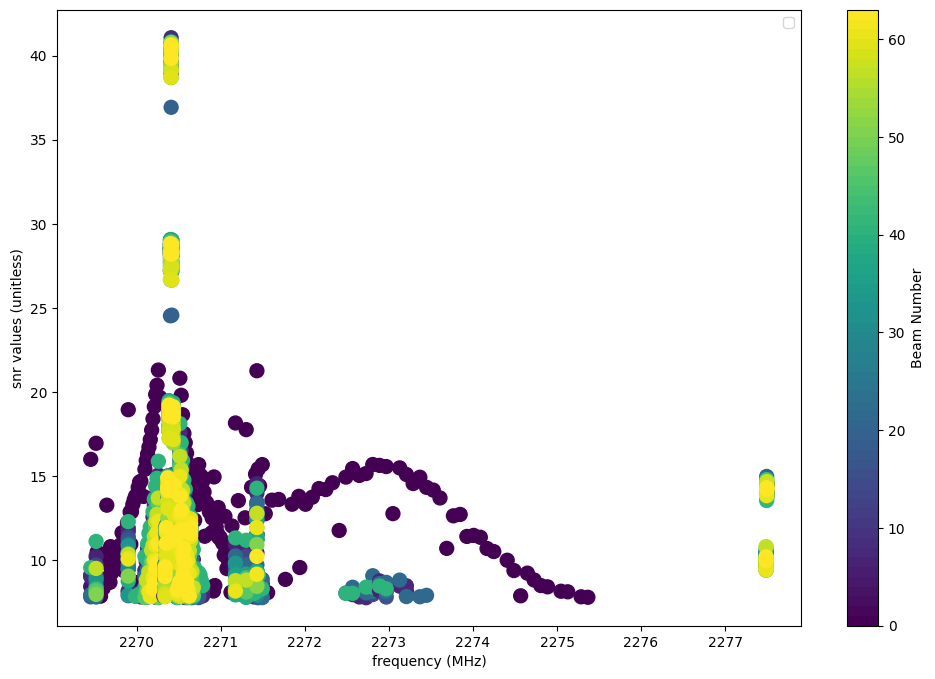

In [20]:
# snr_values = df['signal'].apply(lambda x: x['snr'])
# freq = df['signal'].apply(lambda x: x['frequency'])
# beam = df['signal'].apply(lambda x: x['beam'])
# dr = df['signal'].apply(lambda x: x['driftRate'])
print(df.keys())
snr_values = df['snr']
freq = df['frequency']
beam = df['beam']
first_beam_column = beam.iloc[:, 0]
dr = df['driftRate']


snr_values = 10*np.log10(snr_values)
# freq = np.log10(freq)

cmap = plt.get_cmap('viridis', 63)  # 'viridis' is a good colormap for this purpose

# Create the scatter plot
plt.figure(figsize=(12, 8))
s = plt.scatter(freq, snr_values, c=first_beam_column, cmap=cmap, s=100)
s
plt.xlabel('frequency (MHz)')
plt.ylabel('snr values (unitless)')
plt.legend()
snr_values

# Add a color bar to show the mapping of beam numbers to colors
cbar = plt.colorbar(s)
cbar.set_label('Beam Number')
plt.show()

(59, 1024)
(59, 524288)


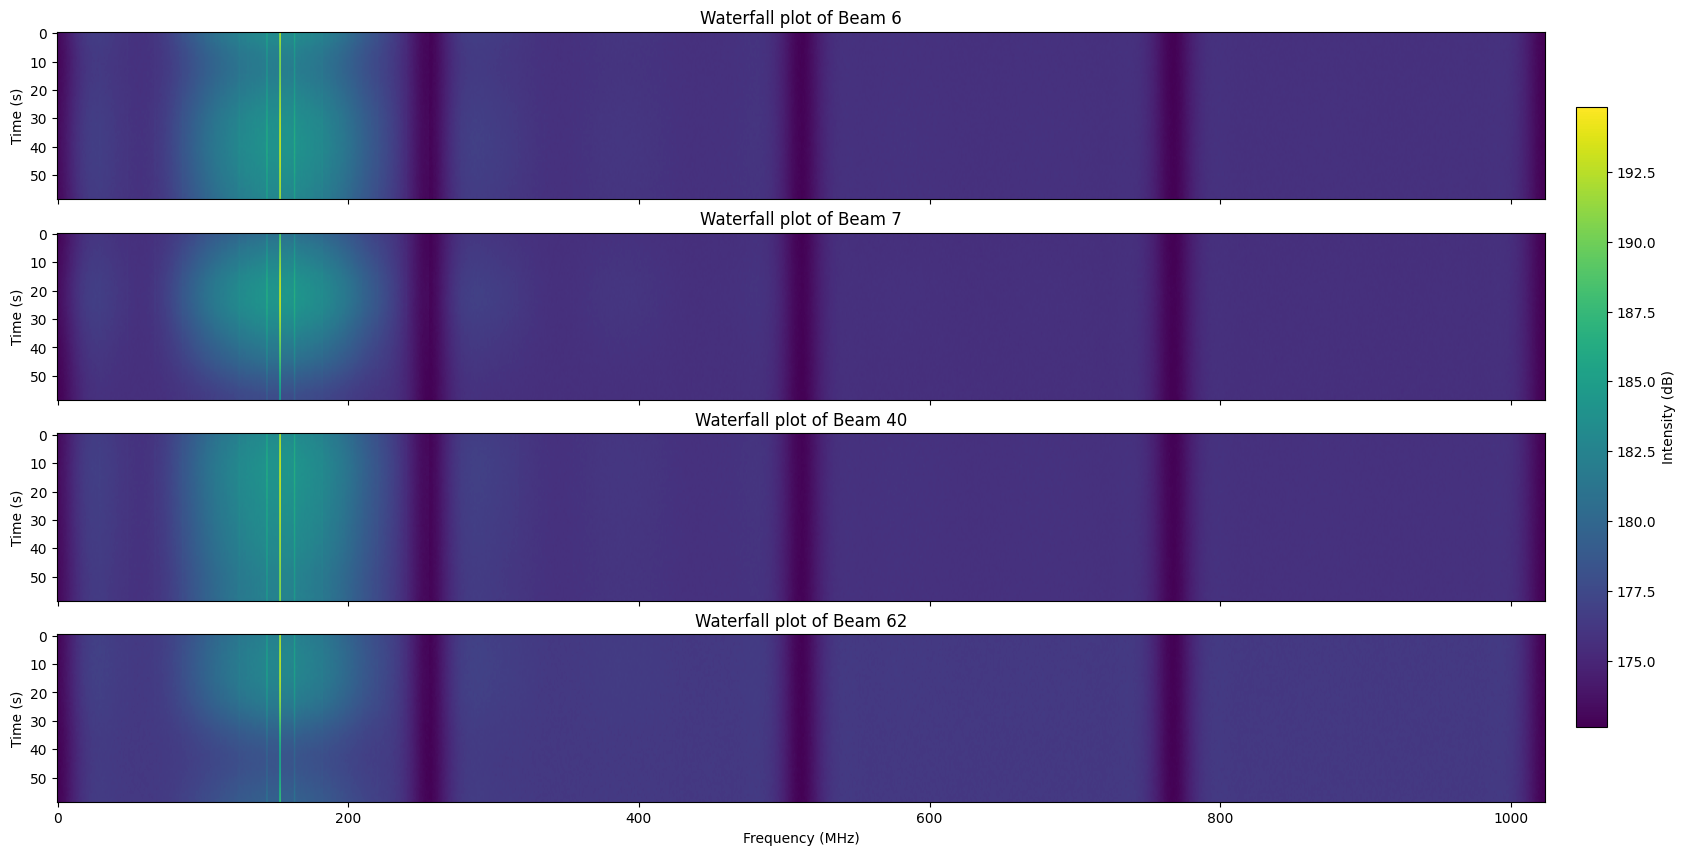

In [21]:
beam0 = '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam00.h5'
beam6 = '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam06.h5'
beam7 = '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam07.h5'
beam8 = '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam08.h5'
beam40 = '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam40.h5'
beam62 = '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam62.h5'

#Load beam 6,7, and 40 h5 files 

#beam 0
with h5py.File(beam0, 'r') as h5_file:
    beam0Data = h5_file["data"][()]   
beam0Data = beam0Data[:, 0, :]

#beam 6
with h5py.File(beam6, 'r') as h5_file:
    beam6Data = h5_file["data"][()]   
beam6Data = beam6Data[:, 0, :]

#Beam 7
with h5py.File(beam7, 'r') as h5_file:
    beam7Data = h5_file["data"][()]  
beam7Data = beam7Data[:, 0, :]

#Beam 40 
with h5py.File(beam40, 'r') as h5_file:
    beam40Data = h5_file["data"][()]  
beam40Data = beam40Data[:, 0, :]

with h5py.File(beam62, 'r') as h5_file:
    beam62Data = h5_file["data"][()]  
beam62Data = beam62Data[:, 0, :]

def combine_channels(data, factor=512):
    """
    Combine channels by summing every 'factor' channels together.
    """
    if data.shape[1] % factor != 0:
        raise ValueError("Number of channels must be divisible by the factor.")
    return data.reshape(data.shape[0], data.shape[1] // factor, factor).sum(axis=2)

beam6Data2 = combine_channels(beam6Data)
beam7Data2 = combine_channels(beam7Data)
beam40Data2 = combine_channels(beam40Data)
beam62Data2 = combine_channels(beam62Data)

print(beam6Data2.shape)

fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True)

# Plot the first dataset
im1 = axes[0].imshow(10 * np.log10(beam6Data2[:, :]), aspect='auto', cmap='viridis')
axes[0].set_ylabel('Time (s)')
axes[0].set_title('Waterfall plot of Beam 6')

# Plot the second dataset
im2 = axes[1].imshow(10 * np.log10(beam7Data2[:,:]), aspect='auto', cmap='viridis')
axes[1].set_ylabel('Time (s)')
axes[1].set_title('Waterfall plot of Beam 7')

# Plot the third dataset
im3 = axes[2].imshow(10 * np.log10(beam40Data2[:, :]), aspect='auto', cmap='viridis')
axes[2].set_ylabel('Time (s)')
axes[2].set_title('Waterfall plot of Beam 40')

print(beam6Data.shape)

# Plot the Fourth Data set 
im4 = axes[3].imshow(10 * np.log10(beam62Data2[:, :]), aspect='auto', cmap='viridis')
axes[3].set_ylabel('Time (s)')
axes[3].set_xlabel('Frequency (MHz)')
axes[3].set_title('Waterfall plot of Beam 62')

cbar = fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('Intensity (dB)')

In [22]:

# # Extract data from the dictionary
# ra_values = [df[beam]['ra'] for beam in df]
# dec_values = [df[beam]['dec'] for beam in df]
# intensities = [df[beam]['intensity'] for beam in df]
# beam_labels = list(df.keys())

# # Create scatter plot
# plt.figure(figsize=(10, 8))
# sc = plt.scatter(ra_values, dec_values, c=intensities, cmap='viridis', s=100, alpha=0.75, edgecolors='k')

# # Add color bar
# cbar = plt.colorbar(sc, orientation='vertical')
# cbar.set_label('Intensity')

# # Annotate beams
# for ra, dec, label in zip(ra_values, dec_values, beam_labels):
#     plt.text(ra, dec + 1, label, ha='center', va='center', fontsize=8)

# plt.xlabel('Right Ascension (degrees)')
# plt.ylabel('Declination (degrees)')
# plt.title('Beam Coverage Plot (RA vs DEC)')
# plt.grid(True)
# plt.show()

In [23]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# # Extract RA and DEC values from the filterbank column
# df['ra'] = df['filterbank'].apply(lambda x: x['ra'])
# df['dec'] = df['filterbank'].apply(lambda x: x['ra'])

# # Create SkyCoord object for beam positions
# beam_positions = SkyCoord(ra=df['ra'].values * u.deg, dec=df['dec'].values * u.deg, frame='icrs')

# # Plotting
# plt.figure(figsize=(10, 8))
# plt.scatter(beam_positions.ra.deg, beam_positions.dec.deg, s=100, alpha=0.75, edgecolors='k')
# plt.xlabel('Right Ascension (degrees)')
# plt.ylabel('Declination (degrees)')
# plt.title('Beam Coverage Plot (RA vs DEC)')
# plt.grid(True)
# plt.show()

# # Example data (replace with your actual data)
# num_beams = 64
# ra_values = df['ra'] * u.rad  # Replace with actual RA values
# dec_values = df['dec'] * u.rad  # Replace with actual DEC values

# # Create SkyCoord object for beam positions
# beam_positions = SkyCoord(ra=ra_values, dec=dec_values, frame='icrs')

# # Plotting
# plt.figure(figsize=(10, 8))
# plt.scatter(beam_positions.ra.rad, beam_positions.dec.rad, s=100, alpha=0.75, edgecolors='k')
# plt.xlabel('Right Ascension (degrees)')
# plt.ylabel('Declination (degrees)')
# plt.title('Spatial Coverage of Beams')
# plt.grid(True)
# plt.show()

In [24]:
# # Example data (replace with your actual data)
# num_beams = 64  # Assuming 64 beams
# num_samples = 100  # Example number of samples
# data = np.random.rand(num_samples, num_beams)  # Example intensities or SNRs data
# df = pd.DataFrame(data)

# # Calculate correlation matrix
# corr_matrix = df.corr()

# # Plotting correlation matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar=True)
# plt.title('Correlation Matrix of Intensities or SNRs between Beams')
# plt.show()

In [25]:
#take the fine channels from the beam01 hit and extract those fine channels from the beam 0,6,7,40 HDF5 files.  
# Then you can plot just those channels and compare to the beam1 hit.  Also for the incoherent beam.

# #find the index of the largest SNR signals
highSNR = np.where(df['snr'] > 10000)[0]
channelRanges = []

# print(df['numTimesteps'].iloc[467].values[0])
# print(len(df))
# print(df['numChannels'].iloc[467])
# print(df['sourceName'][467])

#resize the data with the numTimesteps and numChannels 
for idx in highSNR[:3]:
     data = np.array(df['data'][idx]).reshape((df['numTimesteps'].iloc[idx].values[0], df['numChannels'].iloc[idx]))
     plt.figure(figsize=(18, 8))
     
     #extract frq values from each idx
     fch1 = df['fch1'].iloc[idx]
     print(fch1)
     foff = df['foff'].iloc[idx]
     num_channels = df['numChannels'].iloc[idx]
     
     #create the frequency range 
     def float_range(start, stop, step):
          range_list = []
          while start < stop:
               range_list.append(round(start, 10))
               start += step
          return range_list
          
     fqRange = list(float_range(fch1, fch1+foff*num_channels, foff))
     fqRange = max(fqRange)
     print(fqRange)
     
     # #Extract the freq values from the HDf5 Files 6,7,40, and 62
     # plt.plot(figsize=(20, 10))
     # plt.imshow(10 * np.log10(beam6Data2[:,:]), aspect='auto', cmap='viridis')
     # plt.ylabel('Time (s)')
     # plt.xlabel('Frequency (MHz)')
     # plt.title('Waterfall plot of Beam 6')
     
     plt.figure(figsize=(20, 10))
     im = plt.imshow(10 * np.log10(beam6Data2), aspect='auto', cmap='viridis',
     extent=[fqRange[0], fqRange[-1], 0, data.shape[0]])
     plt.colorbar(im, label='Intensity (dB)')
     plt.xlabel('Frequency (MHz)')
     plt.ylabel('Time Index')
     plt.title(f'Waterfall plot of Beam 6')

plt.tight_layout()
plt.show()

#Beam 6
plt.figure(figsize=(20, 10))
im = plt.imshow(10 * np.log10(beam6Data2), aspect='auto', cmap='viridis',
extent=[range[0], range[-1], 0, beam6Data2.shape[0]])
plt.colorbar(im, label='Intensity (dB)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time Index')
plt.xlim(range)
plt.title(f'Waterfall plot of Beam 6')
plt.show()
     

2270.407214993611
2270.407395903


IndexError: invalid index to scalar variable.

<Figure size 1800x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [ ]:
df.keys()

Index(['sourceName', 'fch1', 'foff', 'tstart', 'tsamp', 'ra', 'dec',
       'telescopeId', 'numTimesteps', 'numChannels', 'data', 'coarseChannel',
       'startChannel', 'beam', 'frequency', 'index', 'driftSteps', 'driftRate',
       'snr', 'coarseChannel', 'beam', 'numTimesteps', 'power',
       'incoherentPower'],
      dtype='object')

78785


4.9085340525714285


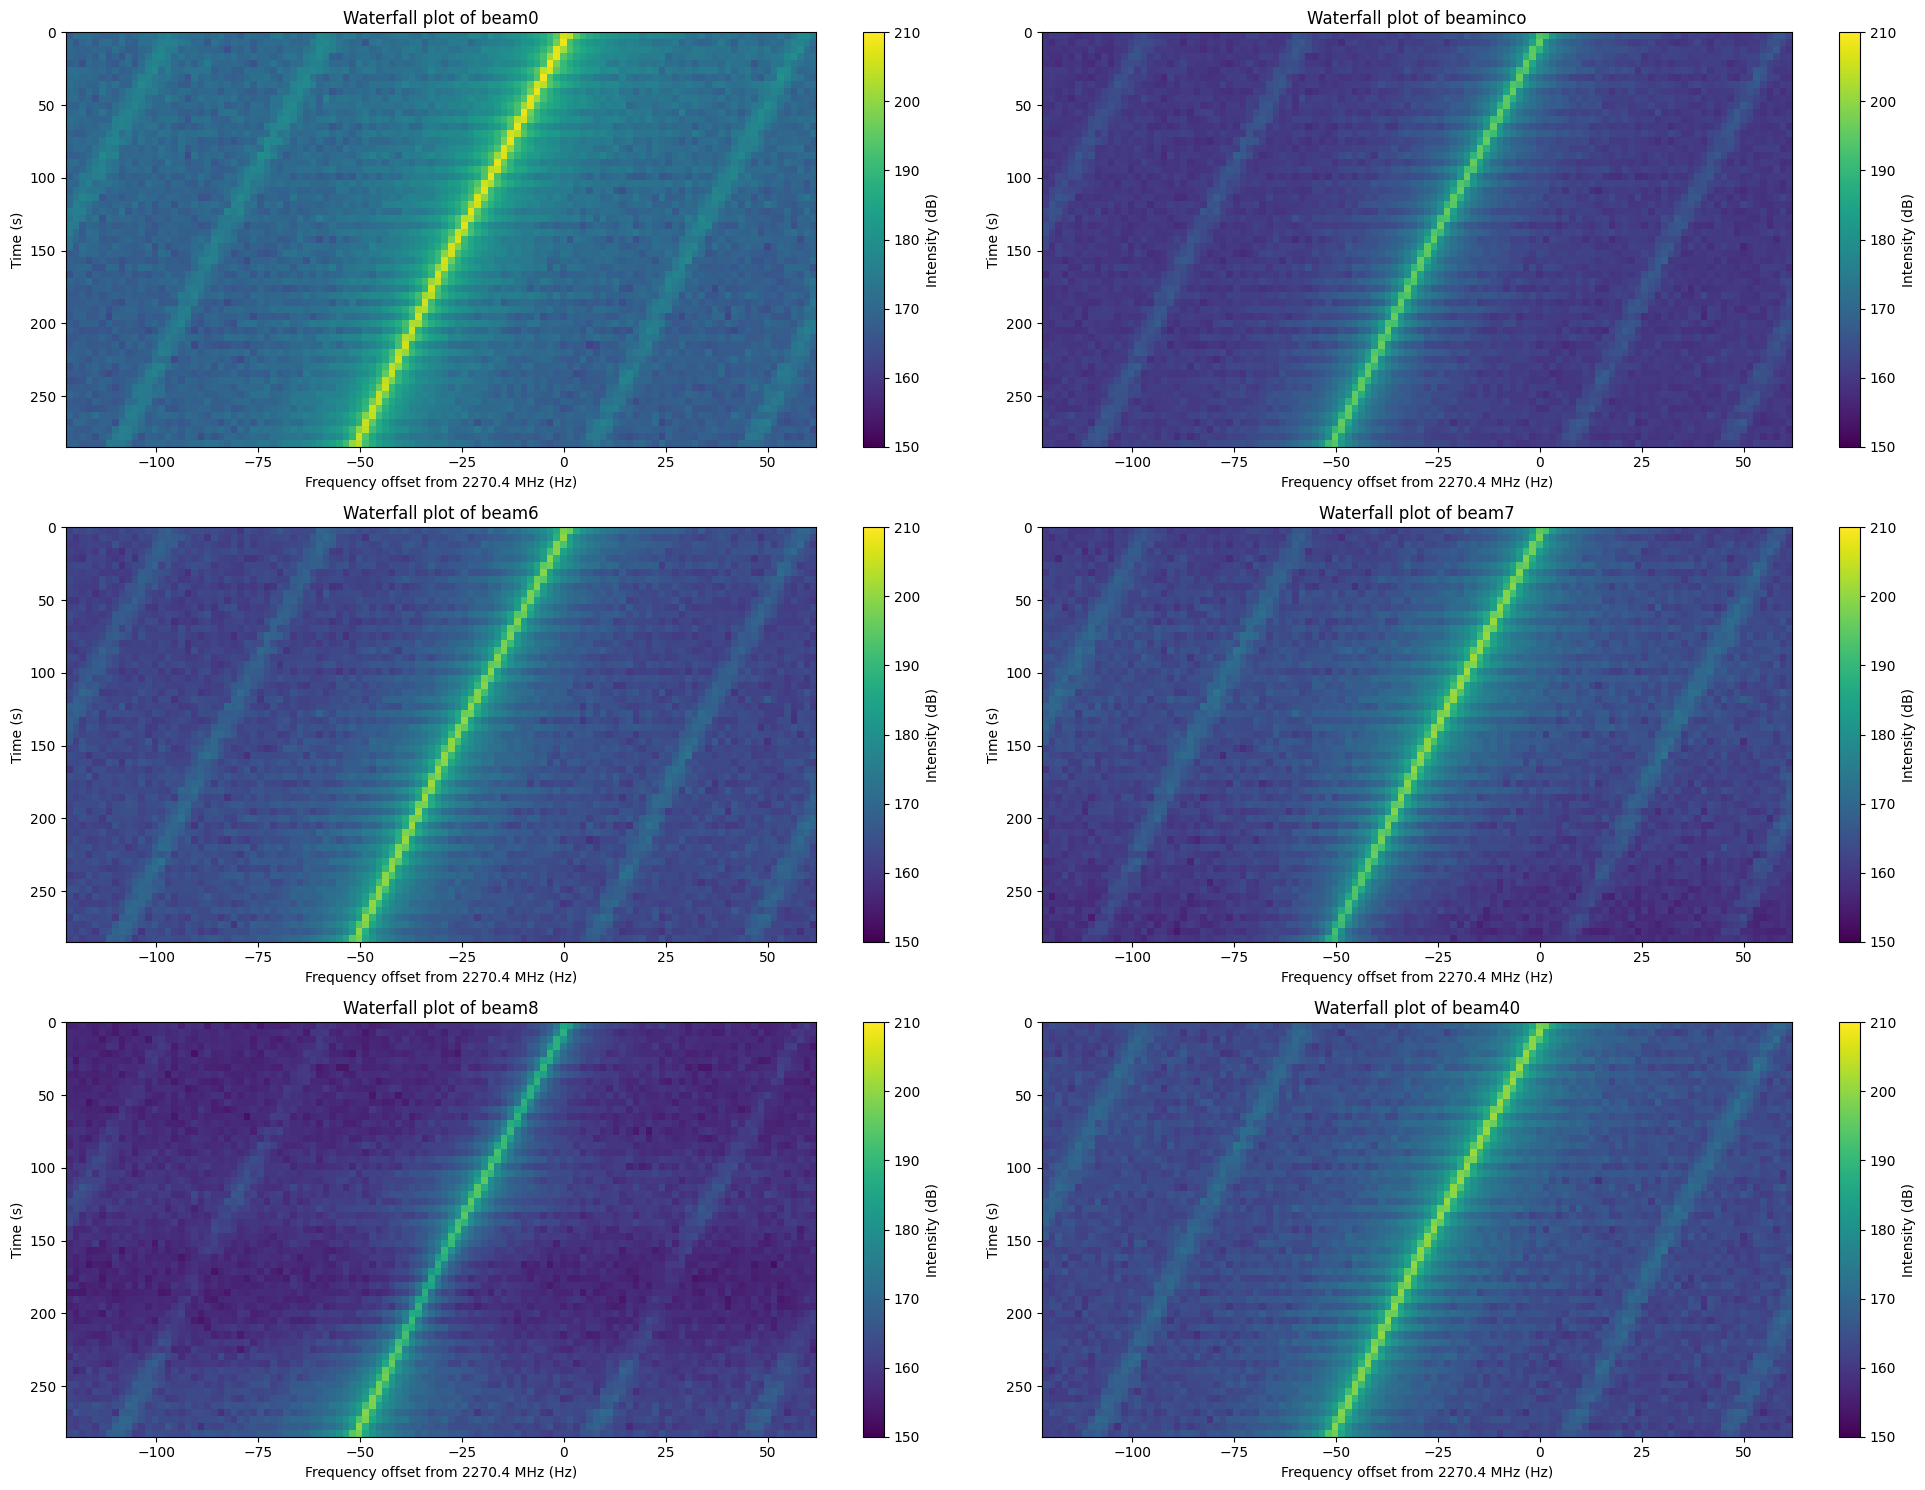

In [ ]:
highSNR = np.where(df['snr'] > 10000)[0]

# Define a function to extract data from HDF5 file
def extract_data_from_h5(file, start_channel, num_channels):
    with h5py.File(file, 'r') as h5_file:
        data = h5_file["data"][()]  # Read the data
    # Select the subset of data
    sdata = data[:, 0, start_channel:start_channel + num_channels]
    subset_data = sdata*tsamp
    return subset_data

def find_main_carrier_frequency(data, fch1, foff):
    first_time_sample = data[0, :]  # Extract the first time sample
    main_carrier_idx = np.argmax(first_time_sample)  # Find the index with the maximum power
    main_carrier_freq = fch1 + main_carrier_idx * foff  # Calculate the frequency
    return main_carrier_freq


def create_frequency_range(fch1, foff, start_channel, num_channels):
    start_freq = fch1 + start_channel * foff
    stop_freq = start_freq + num_channels * foff
    frequencies = np.arange(start_freq, stop_freq, foff)
    return frequencies

def create_frequency_range1(fch1, foff, num_channels):
    return fch1 + np.arange(num_channels) * foff

# Function to create the frequency range
def float_range(start, stop, step):
    range_list = []
    while start < stop:
        range_list.append(round(start, 5))
        start += step
    return range_list

for idx in highSNR[:2]:
    start_channels = df['startChannel'].iloc[idx]
    num_channels = (df['numChannels'].iloc[idx]) 
    foff = (df['foff'].iloc[idx])
    fch1 = (df['fch1'].iloc[idx])
    tsamp = df['tsamp'].iloc[idx]
    index = df['index'].iloc[idx]

print(index)

beam_files = {
    "beam0" : '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam00.h5',
    'beaminco': '/datax/scratch/danielc/jwst-test-data/guppi_60450_05861_003791_JWST_0001.band01.incoherent.h5',
    "beam6": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam06.h5',
    "beam7": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam07.h5',
    'beam8': '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam08.h5',
    "beam40": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam40.h5',
}


# max_num_channels = df.max()['numChannels']
# startchannel = df.max()['startChannel']
# plot_index = 1

# Extract data for each beam
beam_data = {}
for beam, file in beam_files.items():
    beam_data[beam] = extract_data_from_h5(file, start_channels, num_channels)    
    # Create frequency range for the current hit
    #make it freqency offset. the channels are like 1 htz wide. Mhz has too many decimals 
    
    
fqRange = np.array(create_frequency_range(fch1, foff, start_channels, num_channels))
fqRangeMid = np.mean(fqRange)

time_indices = np.arange(data.shape[0])  
time_axis = time_indices * tsamp 

# Find the main carrier frequency for each beam
main_carrier_freqs = {beam: find_main_carrier_frequency(data, fch1, foff) for beam, data in beam_data.items()}

# Create the frequency range
fqRange = create_frequency_range1(fch1, foff, num_channels)
print(tsamp)

plt.figure(figsize=(20, 15))
for i, (beam, data) in enumerate(beam_data.items()):
    plt.subplot(3, 2, i + 1)
    main_carrier_freq = main_carrier_freqs[beam]
    fqRange_adjusted = (fqRange - main_carrier_freq) * 1e6  # Convert to Hz
    plt.imshow((10 * np.log10(data)), aspect='auto', cmap='viridis', vmin=150, vmax=210, extent=[fqRange_adjusted[0], fqRange_adjusted[-1], time_axis[-1], time_axis[0]])
    plt.xlabel('Frequency offset from 2270.4 MHz (Hz)')
    plt.ylabel('Time (s)')
    plt.colorbar(label='Intensity (dB)')
    plt.title(f'Waterfall plot of {beam}')

plt.tight_layout()
plt.show()
fig.savefig('waterfallofBeams.png')


In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Function to extract data from HDF5 file
def extract_data_from_h5(file, start_channel, num_channels):
    with h5py.File(file, 'r') as h5_file:
        data = h5_file["data"][:, 0, start_channel:start_channel + num_channels]
    return data

def create_frequency_range(fch1, foff, start_channel, num_channels):
    start_freq = fch1 + start_channel * foff
    stop_freq = start_freq + num_channels * foff
    frequencies = np.arange(start_freq, stop_freq, foff)
    return frequencies

# Function to create the frequency range
def float_range(start, stop, step):
    range_list = []
    while start < stop:
        range_list.append(round(start, 5))
        start += step
    return range_list

highSNR = np.where(df['snr'] > 10000)[0]

beam_files = {
    "beam6": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam06.h5',
    "beam7": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam07.h5',
    "beam40": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam40.h5',
    "beam62": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam62.h5',
    "beam0": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam00.h5',
    'beaminco': '/datax/scratch/danielc/jwst-test-data/guppi_60450_05861_003791_JWST_0001.band01.incoherent.h5'
}

max_num_channels = df.max()['numChannels']
start_channel = df.max()['startChannel']

plt.figure(figsize=(20, 15))

for idx in highSNR[:2]:
    start_channels = df['startChannel'].iloc[idx]
    num_channels = df['numChannels'].iloc[idx]
    foff = df['foff'].iloc[idx]
    fch1 = df['fch1'].iloc[idx]
    
    
fqRange = create_frequency_range(fch1, foff, start_channel, num_channels)

beam_data = {}
for beam, file in beam_files.items():
    beam_data[beam] = extract_data_from_h5(file, start_channels, num_channels)
    


<Figure size 2000x1500 with 0 Axes>

In [ ]:
highSNR = np.where(df['snr'] > 10000)[0]
max_num_channels = df.max()['numChannels']
print(max_num_channels)
start_channel = df.max()['startChannel']
print(start_channel)
print(foff)
print(fch1)

def create_frequency_range(fch1, foff, start_channel, num_channels):
    start_freq = fch1 + start_channel * foff
    stop_freq = start_freq + num_channels * foff
    frequencies = np.arange(start_freq, stop_freq, foff)
    return frequencies

# Example usage
fch1 = 1000  # Example starting frequency in MHz
foff = 0.1  # Example frequency offset in MHz
start_channel = 10  # Example starting channel index
num_channels = 50  # Example number of channels

fqRange = create_frequency_range(fch1, foff, start_channel, num_channels)


fqRange = list(float_range(fch1 + start_channel, fch1 + (start_channel + max_num_channels), foff))



119
129787
1.6298145055770874e-06
2270.4072133637965


ValueError: num must be an integer with 1 <= num <= 6, not 7

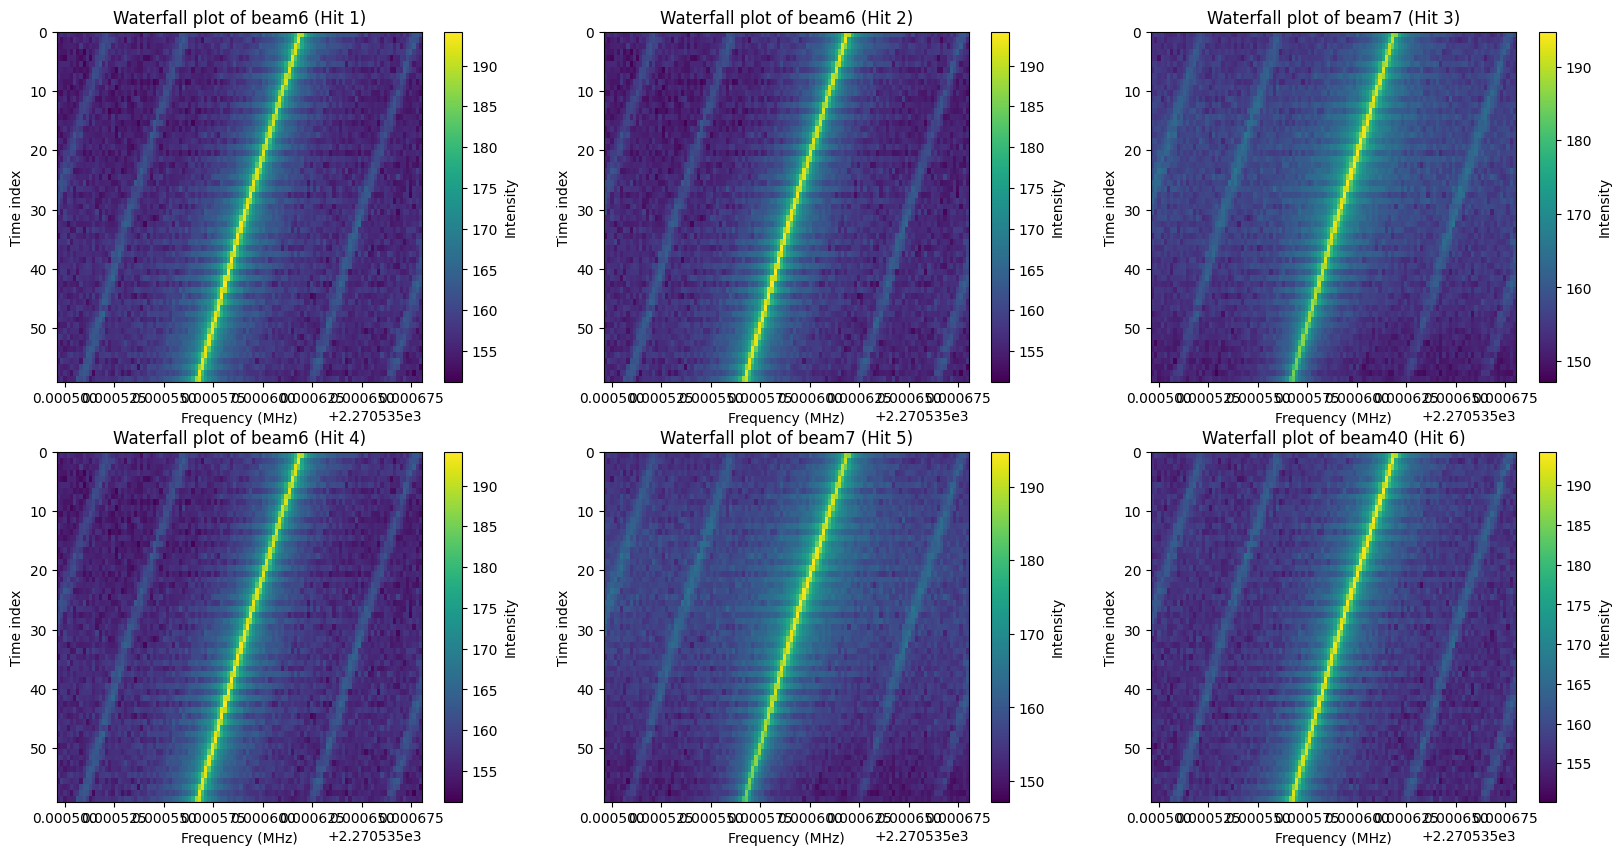

In [ ]:
# Define a function to extract data from HDF5 file
def extract_data_from_h5(file, start_channel, num_channels):
    with h5py.File(file, 'r') as h5_file:
        data = h5_file["data"][()]  # Read the data
    # Select the subset of data
    subset_data = data[:, 0, start_channel:start_channel + num_channels]
    return subset_data

# Function to create the frequency range
def float_range(start, stop, step):
    range_list = []
    while start < stop:
        range_list.append(round(start, 10))
        start += step
    return range_list

beam_files = {
    "beam6": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam06.h5',
    "beam7": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam07.h5',
    "beam40": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam40.h5',
    "beam62": '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam62.h5',
    "beam0" : '/datax/scratch/danielc/jwst-test-data/jwst-may-20/guppi_60450_05861_003791_JWST_0001.band01.beam00.h5',
    'beaminco': '/datax/scratch/danielc/jwst-test-data/guppi_60450_05861_003791_JWST_0001.band01.incoherent.h5'
}

# Extract and plot data for each hit
plt.figure(figsize=(20, 10))
plot_index = 1

# start_channels = (df['startChannel'].iloc[idx])
# num_channels = (df['numChannels'].iloc[idx]) 
# foff = df['foff'].iloc[idx]
# fch1 = (df['fch1'].iloc[idx])


beam_data = {}
for beam, file in beam_files.items():
    beam_data[beam] = extract_data_from_h5(file, start_channels, num_channels)
    
    # Create frequency range for the current hit
    fqRange = list(float_range(fch1 + start_channels * foff, fch1 + (start_channels + num_channels) * foff, foff))
    
    # Plotting
    for beam, data in beam_data.items():
        plt.subplot(2, 3, plot_index)
        plt.imshow(10 * np.log10(data), aspect='auto', cmap='viridis', extent=[fqRange[0], fqRange[-1], data.shape[0], 0])
        plt.colorbar(label='Intensity')
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Time index')
        plt.title(f'Waterfall plot of {beam} (Hit {plot_index})')
        plot_index += 1

plt.tight_layout()
plt.show()
